# Loan Prediction Competition

In this workshop, we will apply ensemble methods such as Random Forest and Gradient Boosting to a loan prediction dataset. The dataset used is a modified subset of the **Loan Prediction Problem Dataset** from Kaggle ([link](https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset)).

## Objective
The task is to predict whether a loan application will be approved based on applicant information.

![Loan Prediction Competition](https://drive.google.com/uc?id=1eipuAdG46mfAgm-KSFth_YEazhJAZHVx)



## Loading the Data

The training dataset is loaded from the **[train.csv](https://drive.google.com/file/d/1Ejs0yaRm3NxFOVIhwQphoDz8voJl6NQx/view?usp=sharing)** file using Pandas. After loading, we inspect the first few rows to understand its structure and check for missing values. Basic preprocessing steps, such as handling null values and encoding categorical variables, will be performed before modeling.


In [310]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [311]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1prsz-DTYi9cfnzHiPU--Nr2pT-832pTg' -O loanpred_train.csv

--2025-09-10 23:37:37--  https://docs.google.com/uc?export=download&id=1prsz-DTYi9cfnzHiPU--Nr2pT-832pTg
Resolving docs.google.com (docs.google.com)... 74.125.195.138, 74.125.195.102, 74.125.195.113, ...
Connecting to docs.google.com (docs.google.com)|74.125.195.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1prsz-DTYi9cfnzHiPU--Nr2pT-832pTg&export=download [following]
--2025-09-10 23:37:38--  https://drive.usercontent.google.com/download?id=1prsz-DTYi9cfnzHiPU--Nr2pT-832pTg&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.107.132, 2607:f8b0:400e:c0d::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.107.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34166 (33K) [application/octet-stream]
Saving to: ‘loanpred_train.csv’

loanpred_train.csv  100%[===================>]  33.37K  --.-KB/s  

In [312]:
# Let's define the "random_state" to ensure reproducible results:
random_state=42

In [313]:
# Let's change the font of Matplotlib plots:
plt.rc('font', family='serif', size=12)

In [314]:
#Let's load the data
# Carguemos los datos:
data = pd.read_csv('loanpred_train.csv')
data

,id,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001535,Male,No,0,Graduate,No,3254,0.0,50.0,360.0,1.0,Urban,Y
1,LP001792,Male,Yes,1,Graduate,No,3315,0.0,96.0,360.0,1.0,Semiurban,Y
2,LP002443,Male,Yes,2,Graduate,No,3340,1710.0,150.0,360.0,0.0,Rural,N
3,LP002517,Male,Yes,1,Not Graduate,No,2653,1500.0,113.0,180.0,0.0,Rural,N
4,LP001894,Male,Yes,0,Graduate,No,2620,2223.0,150.0,360.0,1.0,Semiurban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,LP001744,Male,No,0,Graduate,No,2971,2791.0,144.0,360.0,1.0,Semiurban,Y
487,LP002138,Male,Yes,0,Graduate,No,2625,6250.0,187.0,360.0,1.0,Rural,Y
488,LP001068,Male,Yes,0,Graduate,No,2799,2253.0,122.0,360.0,1.0,Semiurban,Y
489,LP001327,Female,Yes,0,Graduate,No,2484,2302.0,137.0,360.0,1.0,Semiurban,Y


In [315]:
# Let's check the dataset description:
print("Dataset Shape:", data.shape)
print("\nDataset Info:")
data.info(verbose=True)
print("\nDataset Description:")
data.describe()
print("\nMissing Values:")
print(data.isnull().sum().sort_values(ascending=False))
print("\nTarget Variable Distribution:")
print(data['Loan_Status'].value_counts())
print(data['Loan_Status'].value_counts(normalize=True))


Dataset Shape: (491, 13)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 491 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            488 non-null    object 
 3   Dependents         483 non-null    object 
 4   Education          491 non-null    object 
 5   Self_Employed      464 non-null    object 
 6   ApplicantIncome    491 non-null    int64  
 7   CoapplicantIncome  491 non-null    float64
 8   LoanAmount         471 non-null    float64
 9   Loan_Amount_Term   479 non-null    float64
 10  Credit_History     448 non-null    float64
 11  Property_Area      491 non-null    object 
 12  Loan_Status        491 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 50.0+ KB

Dataset Description:

Missing Values:
Credit_History       43
Self_Empl

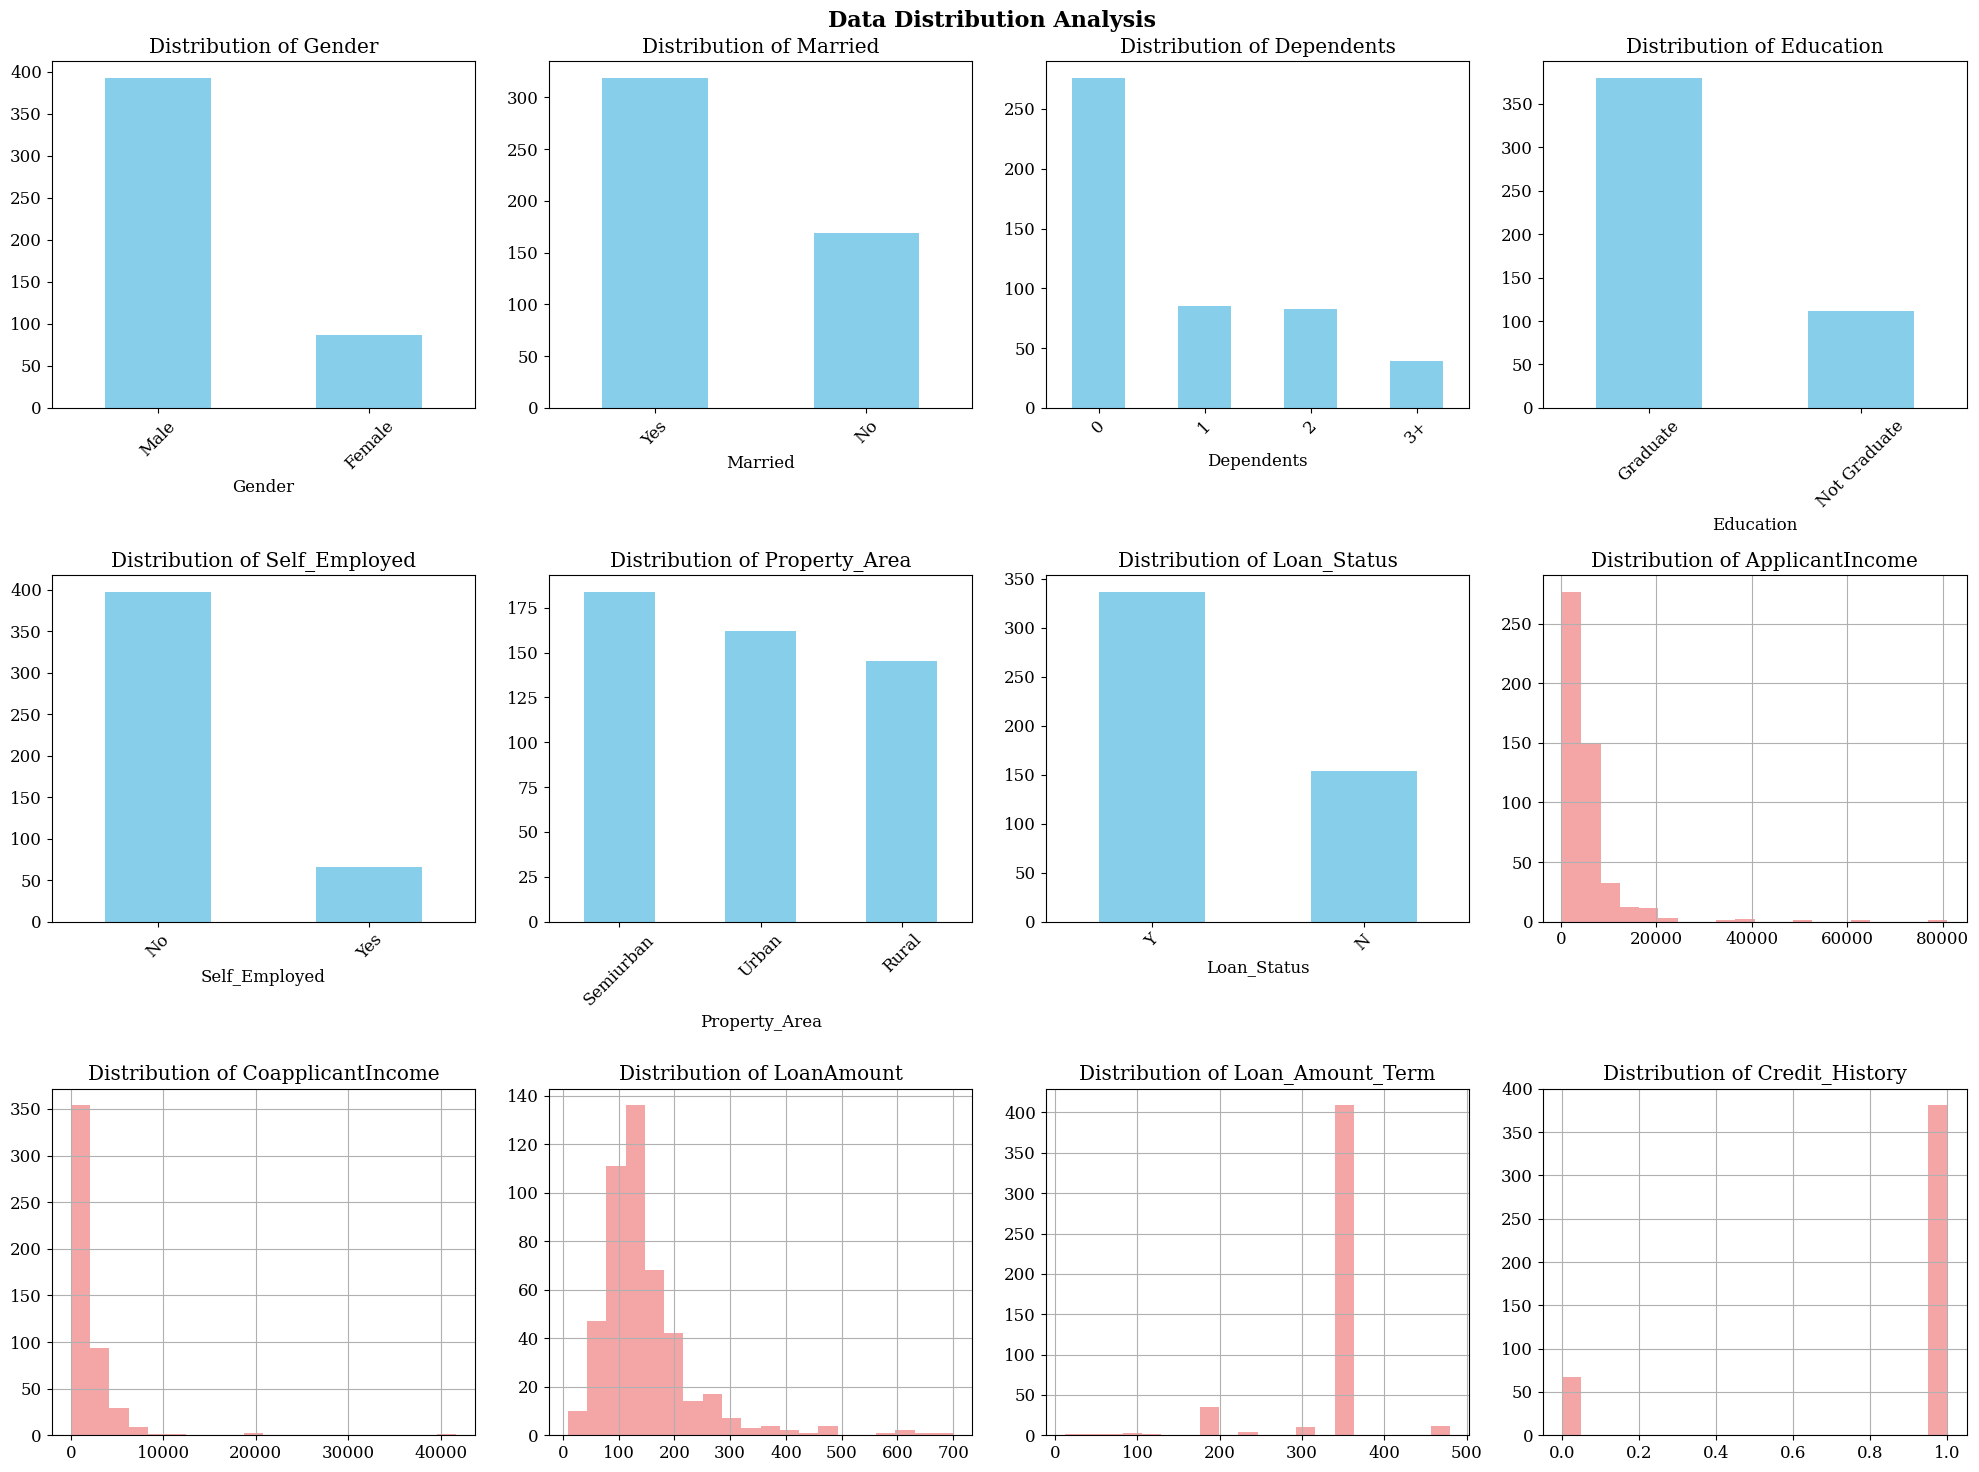

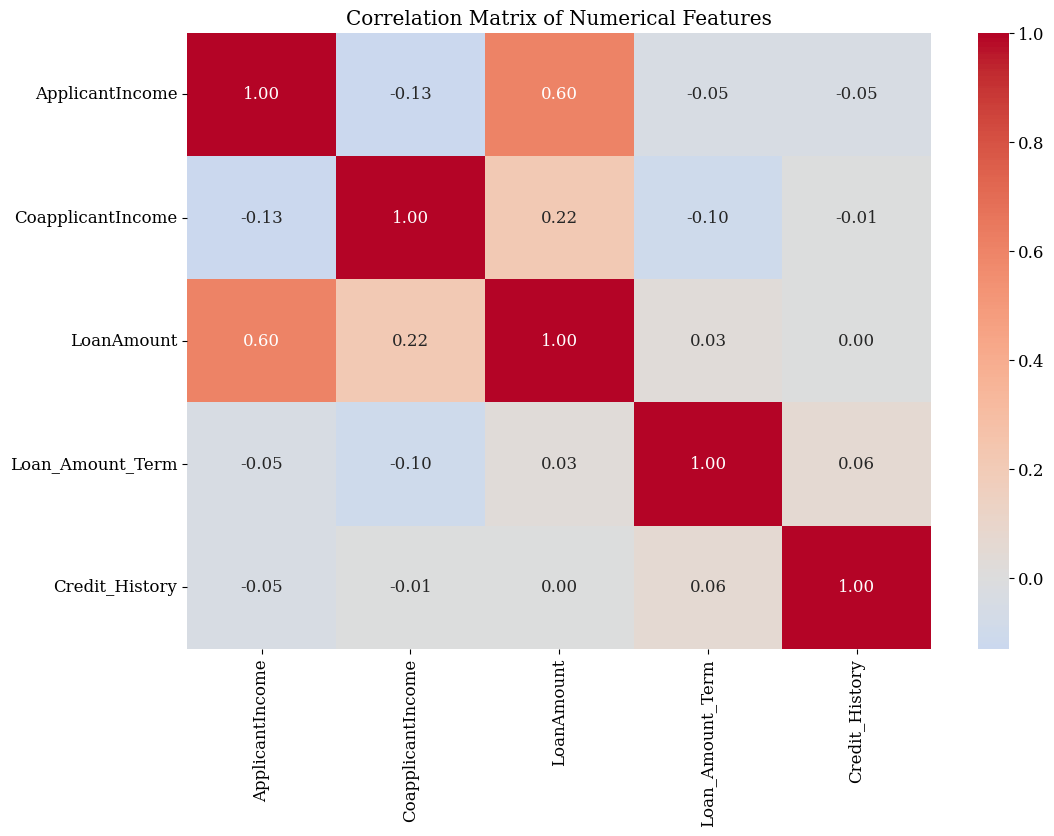

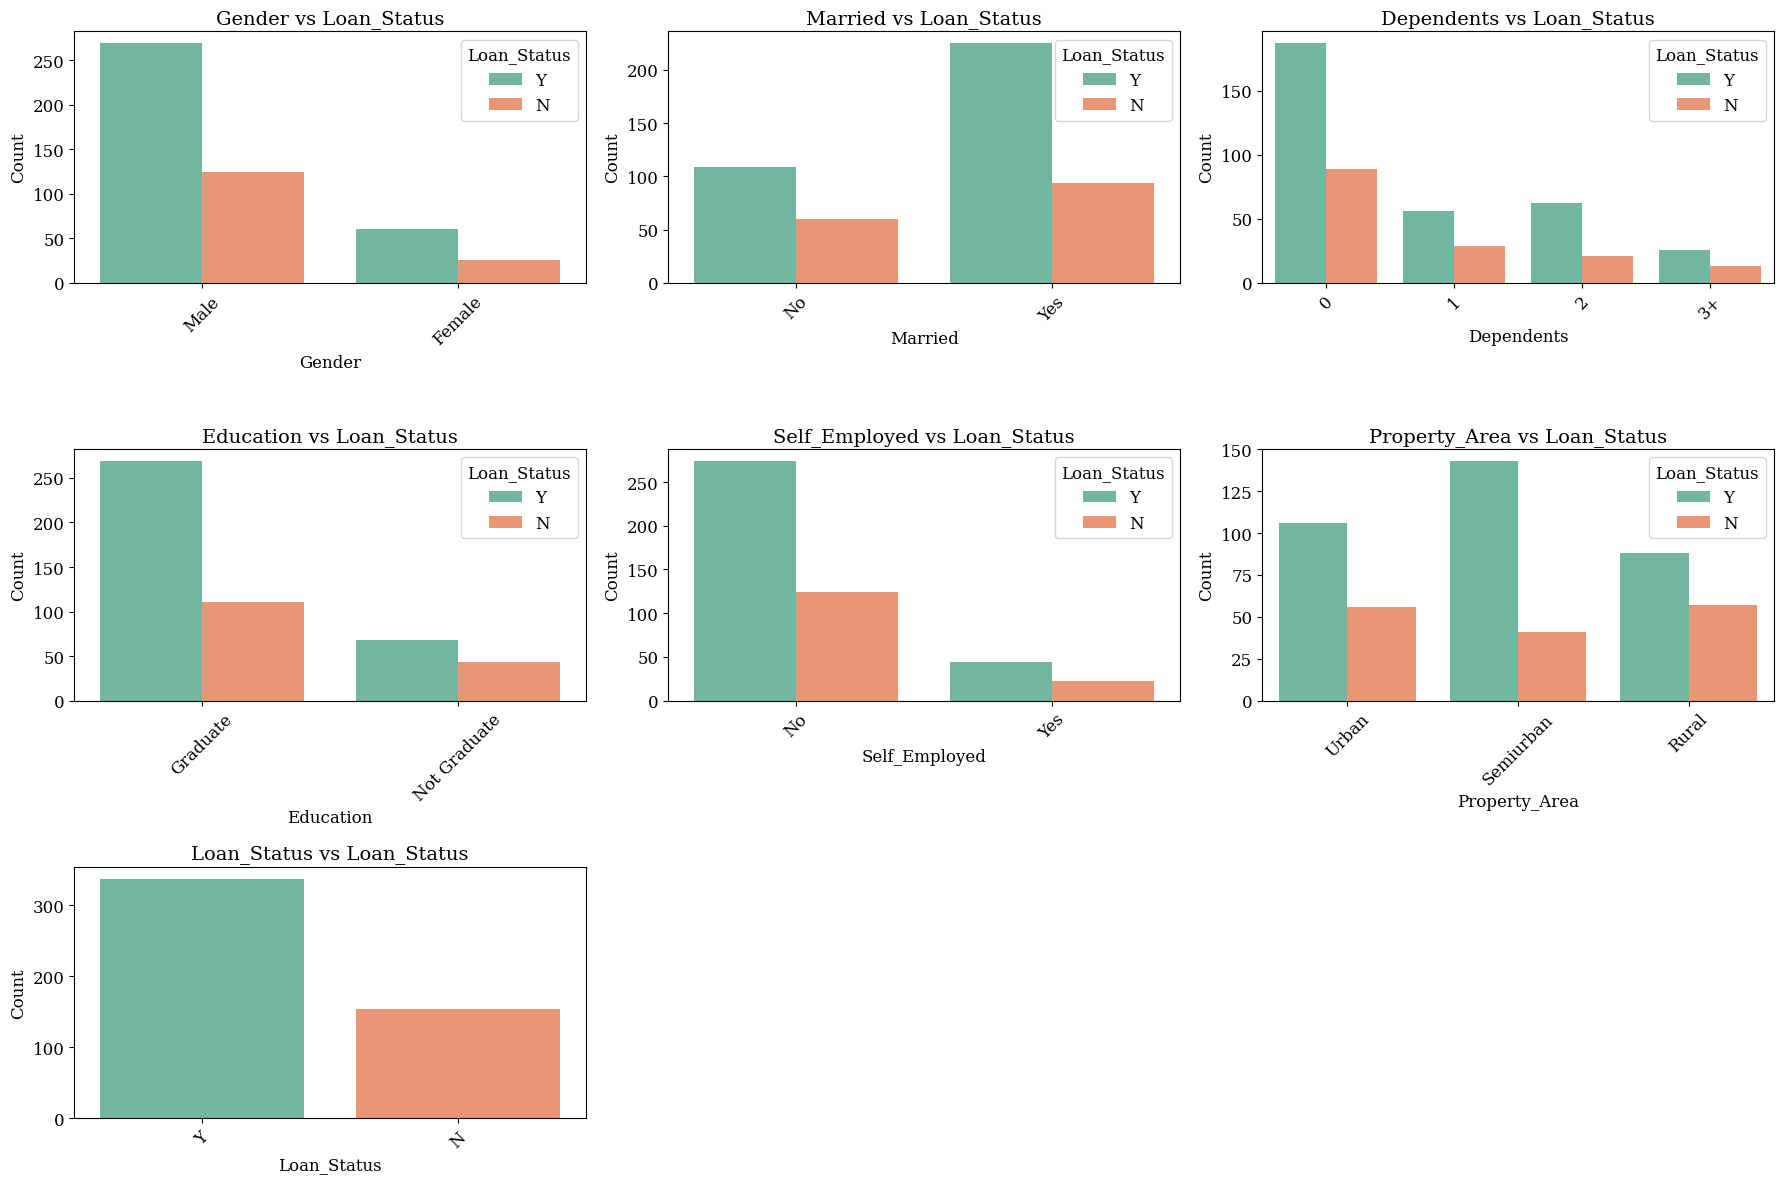

In [316]:
# Let's check the distribution of the columns
import warnings
warnings.filterwarnings('ignore')

# Create subplots for visualizations
fig, axes = plt.subplots(3, 4, figsize=(20, 15))
fig.suptitle('Data Distribution Analysis', fontsize=16, fontweight='bold')

# Categorical variables
categorical_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
for i, col in enumerate(categorical_cols):
    row = i // 4
    col_idx = i % 4
    data[col].value_counts().plot(kind='bar', ax=axes[row, col_idx], color='skyblue')
    axes[row, col_idx].set_title(f'Distribution of {col}')
    axes[row, col_idx].tick_params(axis='x', rotation=45)

# Numerical variables
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
for i, col in enumerate(numerical_cols):
    row = (i + len(categorical_cols)) // 4
    col_idx = (i + len(categorical_cols)) % 4
    if row < 3 and col_idx < 4:  # Make sure we don't exceed subplot limits
        data[col].hist(bins=20, ax=axes[row, col_idx], color='lightcoral', alpha=0.7)
        axes[row, col_idx].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

# Correlation matrix
plt.figure(figsize=(12, 8))
# Select only numerical columns for correlation
numerical_data = data.select_dtypes(include=[np.number])
correlation_matrix = numerical_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()


plt.figure(figsize=(18, 12))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)  # 2 filas, 3 columnas de subplots
    sns.countplot(x=col, hue='Loan_Status', data=data, palette='Set2')
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.title(f'{col} vs Loan_Status', fontsize=14)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



## Data Preprocessing Pipeline

Before modeling, we preprocess the dataset by handling missing values, encoding categorical variables, and scaling numerical features if necessary. This ensures that the data is clean and properly formatted for training machine learning models.


In [317]:
!pip install feature-engine

In [318]:
# Let's complete the data analysis stage and define the preprocessing pipeline
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from feature_engine.outliers import Winsorizer
import joblib

In [319]:
X = data.drop(['id', 'Loan_Status'], axis=1)
y = data['Loan_Status']

In [320]:
# Encode target variable (Y=1, N=0)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

print("Target encoding:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

Target encoding: {'N': np.int64(0), 'Y': np.int64(1)}


### Create preprocessing pipelines

In [321]:
# Identify categorical and numerical columns
categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

print(f"Categorical features: {categorical_features}")
print(f"Numerical features: {numerical_features}")

Categorical features: ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
Numerical features: ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [322]:
print("Numerical features:", numerical_features)
print("Categorical features:", categorical_features)
print("\nTipos de datos:")
print(data.dtypes)

print("\nValores únicos de Loan_Status:", data['Loan_Status'].unique())

Numerical features: ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
Categorical features: ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']

Tipos de datos:
id                    object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Valores únicos de Loan_Status: ['Y' 'N']


In [323]:
# For numerical features: impute missing values with median and scale
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('winsor', Winsorizer(capping_method='quantiles', tail='both', fold=0.1, variables=None)),
    ('scaler',  RobustScaler())
])

# For categorical features: impute missing values with most frequent and one-hot encode
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first', sparse_output=False))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

print("Preprocessing pipeline created successfully!")

Preprocessing pipeline created successfully!


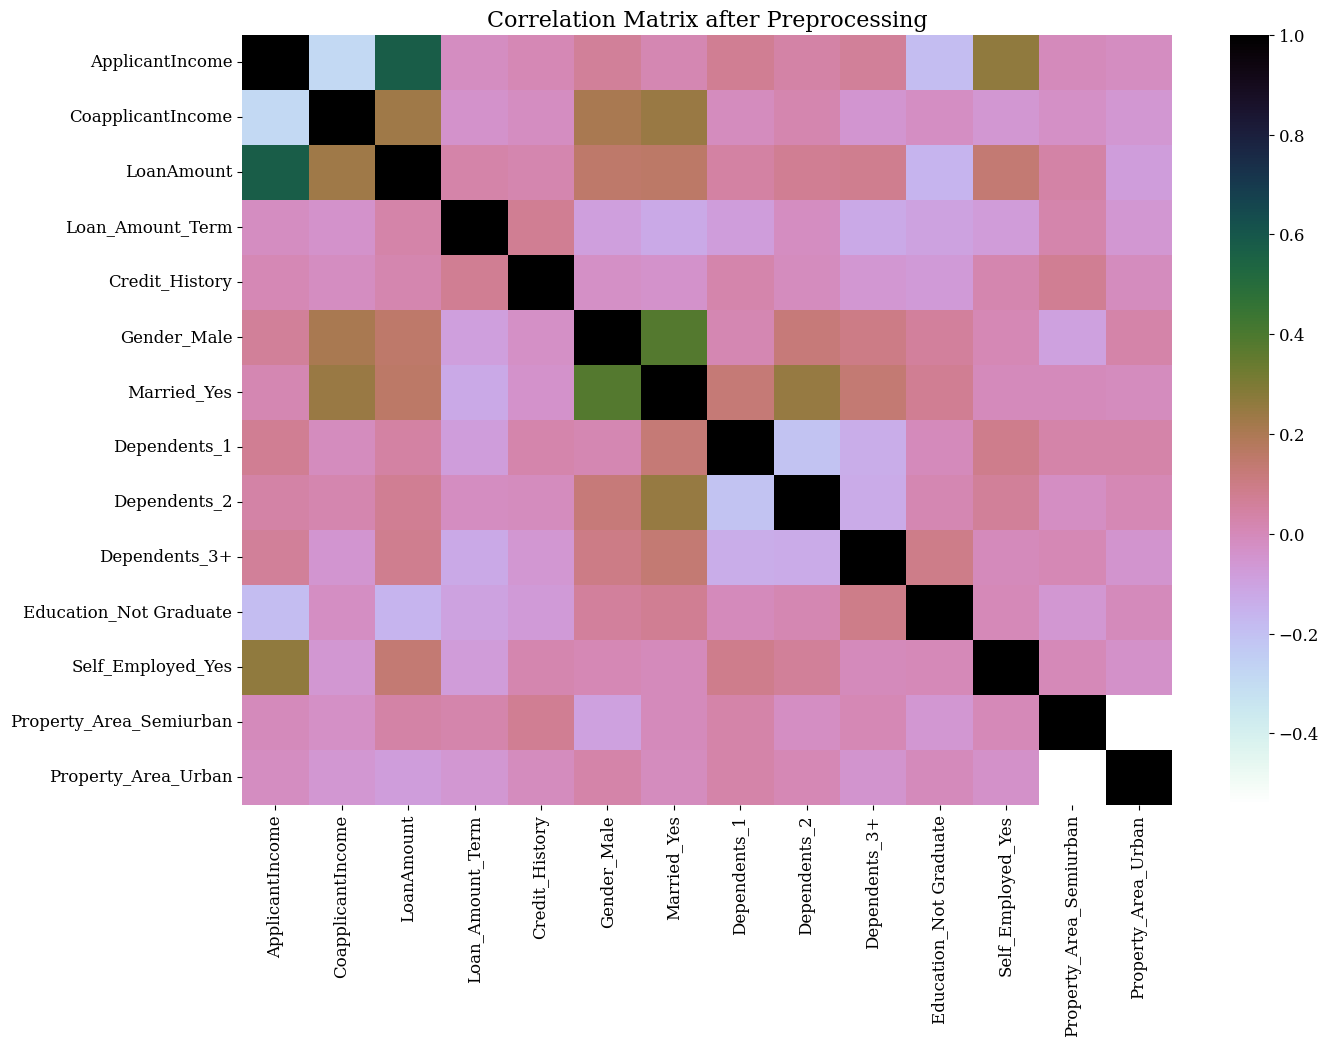

In [324]:
# ---- Ajustar y transformar los datos de entrenamiento ----
X_train_transformed = preprocessor.fit_transform(data.drop('Loan_Status', axis=1))

# Recuperar nombres de las columnas después del preprocesamiento
num_features_out = numerical_features
cat_features_out = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)

all_features = list(num_features_out) + list(cat_features_out)

# Convertir el array transformado a DataFrame con nombres de columnas
X_preprocessed_df = pd.DataFrame(X_train_transformed, columns=all_features)

# ---- Matriz de correlación ----
plt.figure(figsize=(15,10))
sns.heatmap(X_preprocessed_df.corr(), cmap='cubehelix_r', annot=False, cbar=True)
plt.title("Correlation Matrix after Preprocessing", fontsize=16)
plt.show()

# Model Training and Evaluation  

We train machine learning models, such as Random Forest, Gradient Boosting or XGBoost, to predict loan approval. The models are evaluated using appropriate metrics, and hyperparameter tuning is performed to optimize their performance.

In this section, we define the steps for training and evaluating the models.  

## Steps:  
1. **Define the hyperparameters**: Set initial values for model parameters.  
2. **Choose the cross-validation strategy**: Split the dataset into training and validation sets using an appropriate method.  
3. **Train the model**: Fit the model on training data using the defined hyperparameters.  
4. **Evaluate performance**: Use cross-validation to assess the model’s predictive ability.  
5. **Tune hyperparameters (if necessary)**: Optimize parameters for better performance.  

## Hyperparameters  
We define key hyperparameters for Random Forest and Gradient Boosting models, such as:  
- **n_estimators**: Number of trees in the ensemble.  
- **max_depth**: Maximum depth of each tree.  
- **learning_rate** (for boosting models): Controls step size for weight updates.  
- **min_samples_split**: Minimum samples required to split a node.  
- **min_samples_leaf**: Minimum samples required in a leaf node.  

## Cross-Validation Strategy  
To ensure reliable model evaluation, we use **K-Fold Cross-Validation**, which splits the dataset into **K** subsets (folds). The model is trained on **K-1** folds and tested on the remaining fold, repeating the process **K** times. This helps in reducing variance and providing a better generalization estimate.  




In [325]:
X_train, X_test, y_train, y_test = train_test_split(
    X_preprocessed_df,
    y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)

### Models

In [326]:
#ML models
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [327]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)

y_predict = DT.predict(X_test)

#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
DT_SC = accuracy_score(y_predict,y_test)
print(f"{round(DT_SC*100,2)}% Accurate")

dt_importances = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": DT.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("\n=== Importancia Decision Tree ===")
print(dt_importances)

              precision    recall  f1-score   support

           0       0.72      0.58      0.64        31
           1       0.82      0.90      0.86        68

    accuracy                           0.80        99
   macro avg       0.77      0.74      0.75        99
weighted avg       0.79      0.80      0.79        99

79.8% Accurate

=== Importancia Decision Tree ===
                    Feature  Importance
0           ApplicantIncome    0.277544
4            Credit_History    0.261473
2                LoanAmount    0.170246
1         CoapplicantIncome    0.082834
13      Property_Area_Urban    0.033520
7              Dependents_1    0.033098
9             Dependents_3+    0.029257
12  Property_Area_Semiurban    0.023969
10   Education_Not Graduate    0.021439
5               Gender_Male    0.020307
3          Loan_Amount_Term    0.018204
6               Married_Yes    0.011072
8              Dependents_2    0.009843
11        Self_Employed_Yes    0.007195


In [328]:
RF = RandomForestClassifier()
RF.fit(X_train, y_train)

y_predict = RF.predict(X_test)

#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
RF_SC = accuracy_score(y_predict,y_test)
print(f"{round(RF_SC*100,2)}% Accurate")

# Para DecisionTree
rf_importances = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": RF.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("\n=== Importancia Decision Tree ===")
print(rf_importances)

              precision    recall  f1-score   support

           0       0.83      0.48      0.61        31
           1       0.80      0.96      0.87        68

    accuracy                           0.81        99
   macro avg       0.82      0.72      0.74        99
weighted avg       0.81      0.81      0.79        99

80.81% Accurate

=== Importancia Decision Tree ===
                    Feature  Importance
4            Credit_History    0.218814
0           ApplicantIncome    0.211954
2                LoanAmount    0.180838
1         CoapplicantIncome    0.121933
13      Property_Area_Urban    0.032350
3          Loan_Amount_Term    0.029018
7              Dependents_1    0.028996
12  Property_Area_Semiurban    0.028726
6               Married_Yes    0.028224
10   Education_Not Graduate    0.027951
11        Self_Employed_Yes    0.026627
5               Gender_Male    0.023094
8              Dependents_2    0.022733
9             Dependents_3+    0.018742


In [329]:
XGB = XGBClassifier()
XGB.fit(X_train, y_train)

y_predict = XGB.predict(X_test)

#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
XGB_SC = accuracy_score(y_predict,y_test)
print(f"{round(XGB_SC*100,2)}% Accurate")

xgb_importances = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": XGB.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("\n=== Importancia XGBoost ===")
print(xgb_importances)

              precision    recall  f1-score   support

           0       0.73      0.52      0.60        31
           1       0.81      0.91      0.86        68

    accuracy                           0.79        99
   macro avg       0.77      0.71      0.73        99
weighted avg       0.78      0.79      0.78        99

78.79% Accurate

=== Importancia XGBoost ===
                    Feature  Importance
4            Credit_History    0.391776
10   Education_Not Graduate    0.067217
1         CoapplicantIncome    0.063855
3          Loan_Amount_Term    0.060992
11        Self_Employed_Yes    0.050356
13      Property_Area_Urban    0.048342
12  Property_Area_Semiurban    0.047884
7              Dependents_1    0.044379
2                LoanAmount    0.043431
0           ApplicantIncome    0.042338
8              Dependents_2    0.039391
6               Married_Yes    0.034850
5               Gender_Male    0.032655
9             Dependents_3+    0.032533


In [330]:
LR = LogisticRegression()
LR.fit(X_train, y_train)

y_predict = LR.predict(X_test)

#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
LR_SC = accuracy_score(y_predict,y_test)
print(f"{round(accuracy_score(y_predict,y_test)*100,2)}% Accurate")

abs_coef = abs(LR.coef_[0])
log_importances = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": LR.coef_[0],
    "Abs_Coefficient": abs_coef,
    "Importance": abs_coef / abs_coef.sum()   # normalizado a suma=1
}).sort_values(by="Importance", ascending=False)

print("\n=== Importancia Logistic Regression (normalizada) ===")
print(log_importances)

              precision    recall  f1-score   support

           0       0.92      0.39      0.55        31
           1       0.78      0.99      0.87        68

    accuracy                           0.80        99
   macro avg       0.85      0.69      0.71        99
weighted avg       0.82      0.80      0.77        99

79.8% Accurate

=== Importancia Logistic Regression (normalizada) ===
                    Feature  Coefficient  Abs_Coefficient  Importance
4            Credit_History     3.095149         3.095149    0.445259
12  Property_Area_Semiurban     0.802440         0.802440    0.115437
8              Dependents_2     0.394960         0.394960    0.056818
2                LoanAmount    -0.392819         0.392819    0.056510
6               Married_Yes     0.386575         0.386575    0.055612
10   Education_Not Graduate    -0.381654         0.381654    0.054904
11        Self_Employed_Yes    -0.329703         0.329703    0.047430
9             Dependents_3+     0.319477   

In [331]:
all_importances = {
    "DecisionTree": DT.feature_importances_,
    "RandomForest": RF.feature_importances_,
    "XGBoost": XGB.feature_importances_,
    "LogisticRegression": abs(LR.coef_[0])
}

df_importances = pd.DataFrame(all_importances, index=X_train.columns)
df_importances = df_importances.sort_values(by="XGBoost", ascending=False)  # ordenar por uno de ellos
importances_norm = df_importances.div(df_importances.sum(axis=0), axis=1)
importances_norm["Average"] = importances_norm.mean(axis=1)
importances_final = importances_norm.sort_values(by="Average", ascending=False)
print("\n=== Ranking Promedio de Importancia ===")
print(importances_final[["Average"]])



=== Ranking Promedio de Importancia ===
                          Average
Credit_History           0.329330
ApplicantIncome          0.142263
LoanAmount               0.112756
CoapplicantIncome        0.072670
Property_Area_Semiurban  0.054004
Education_Not Graduate   0.042878
Property_Area_Urban      0.035260
Self_Employed_Yes        0.032902
Married_Yes              0.032440
Dependents_2             0.032196
Dependents_3+            0.031623
Dependents_1             0.029647
Loan_Amount_Term         0.027227
Gender_Male              0.024805


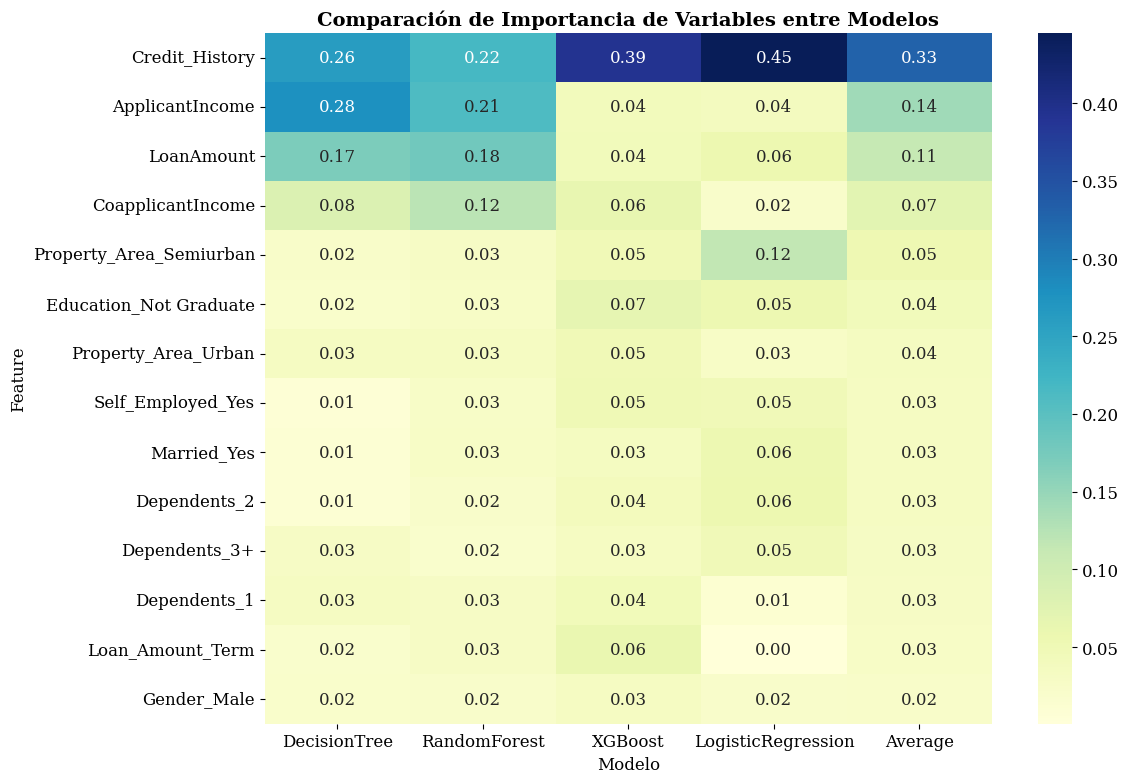

In [350]:
import matplotlib.pyplot as plt
import seaborn as sns

# Usar las features como índice
df_plot = importances_final.copy()
df_plot = df_plot.sort_values(by="Average", ascending=False)  # ordenar por promedio
df_plot = df_plot.set_index(df_plot.index)  # aseguramos que Feature esté como índice

plt.figure(figsize=(12,8))
sns.heatmap(df_plot, annot=True, cmap="YlGnBu", fmt=".2f")

plt.title("Comparación de Importancia de Variables entre Modelos", fontsize=14, fontweight="bold")
plt.xlabel("Modelo")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()




# Optimizar los modelos

In [333]:
!pip install optuna


In [334]:
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [335]:
def objective(trial):
    # Elegir modelo
    model_name = trial.suggest_categorical("model", ["LogisticRegression", "DecisionTree", "RandomForest", "XGBoost"])

    if model_name == "LogisticRegression":
        params = {
            "C": trial.suggest_float("C", 1e-3, 1e3, log=True),
            "solver": trial.suggest_categorical("solver", ["lbfgs", "saga"]),
            "penalty": "l2"
        }
        model = LogisticRegression(max_iter=2000, **params)

    elif model_name == "DecisionTree":
        params = {
            "max_depth": trial.suggest_int("max_depth", 2, 500),
            "min_samples_split": trial.suggest_int("min_samples_split", 2, 200),
            "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 200)
        }
        model = DecisionTreeClassifier(**params)

    elif model_name == "RandomForest":
        params = {
            "n_estimators": trial.suggest_int("n_estimators", 2, 500),
            "max_depth": trial.suggest_int("max_depth", 2, 20),
            "min_samples_split": trial.suggest_int("min_samples_split", 2, 20),
            "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 200)
        }
        model = RandomForestClassifier(**params, n_jobs=-1)

    elif model_name == "XGBoost":
        params = {
            "n_estimators": trial.suggest_int("n_estimators", 2, 500),
            "max_depth": trial.suggest_int("max_depth", 3, 15),
            "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
            "subsample": trial.suggest_float("subsample", 0.5, 1.0),
            "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
            "gamma": trial.suggest_float("gamma", 0, 5),
            "min_child_weight": trial.suggest_int("min_child_weight", 1, 100)
        }
        model = XGBClassifier(use_label_encoder=False, eval_metric="logloss", n_jobs=-1, **params)

    # Definir pipeline (preprocesador + modelo)
    pipe = Pipeline(steps=[
        ("classifier", model)
    ])

    # Validación cruzada
    scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring="accuracy", n_jobs=-1)
    return scores.mean()



In [336]:
# Crear estudio multi-modelo
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20)  # puedes subir a 100+

print("🏆 Mejor accuracy en CV:", round(study.best_value*100,2))
print("🎯 Mejor combinación:", study.best_params)

[I 2025-09-10 23:38:04,146] A new study created in memory with name: no-name-ac4007ef-50eb-406a-bd51-a3d724e82470
[I 2025-09-10 23:38:08,263] Trial 0 finished with value: 0.6862382343395002 and parameters: {'model': 'XGBoost', 'n_estimators': 92, 'max_depth': 12, 'learning_rate': 0.025821547458077174, 'subsample': 0.6216065551997318, 'colsample_bytree': 0.9478351334734438, 'gamma': 2.250415483521435, 'min_child_weight': 78}. Best is trial 0 with value: 0.6862382343395002.
[I 2025-09-10 23:38:08,450] Trial 1 finished with value: 0.6862382343395002 and parameters: {'model': 'XGBoost', 'n_estimators': 70, 'max_depth': 14, 'learning_rate': 0.06156516783585604, 'subsample': 0.932409251799718, 'colsample_bytree': 0.8247874346781898, 'gamma': 4.259909717808269, 'min_child_weight': 79}. Best is trial 0 with value: 0.6862382343395002.
[I 2025-09-10 23:38:14,225] Trial 2 finished with value: 0.6862382343395002 and parameters: {'model': 'RandomForest', 'n_estimators': 397, 'max_depth': 6, 'min_sa

🏆 Mejor accuracy en CV: 79.85
🎯 Mejor combinación: {'model': 'LogisticRegression', 'C': 0.9880026935660624, 'solver': 'saga'}


In [337]:
best_params = study.best_params
best_model_name = best_params.pop("model")

print(f"✅ El mejor modelo fue: {best_model_name}")
print("Con parámetros:", best_params)

# Reconstruir el mejor modelo según Optuna
if best_model_name == "LogisticRegression":
    best_clf = LogisticRegression(max_iter=2000, **best_params)
elif best_model_name == "DecisionTree":
    best_clf = DecisionTreeClassifier(**best_params)
elif best_model_name == "RandomForest":
    best_clf = RandomForestClassifier(**best_params, n_jobs=-1)
elif best_model_name == "XGBoost":
    best_clf = XGBClassifier(use_label_encoder=False, eval_metric="logloss", n_jobs=-1, **best_params)

best_pipe = Pipeline(steps=[
    ("classifier", best_clf)
])

best_pipe.fit(X_train, y_train)
y_pred = best_pipe.predict(X_test)

print("📊 Reporte final en test:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

✅ El mejor modelo fue: LogisticRegression
Con parámetros: {'C': 0.9880026935660624, 'solver': 'saga'}
📊 Reporte final en test:
              precision    recall  f1-score   support

           0       0.92      0.39      0.55        31
           1       0.78      0.99      0.87        68

    accuracy                           0.80        99
   macro avg       0.85      0.69      0.71        99
weighted avg       0.82      0.80      0.77        99

Accuracy: 0.797979797979798


# Finalizing the Model: Training a Full Pipeline  

Once the best model parameters have been selected, it is essential to **train a complete pipeline** that explicitly separates **data preprocessing** and **model training**. This ensures that preprocessing steps are consistently applied to both training and unseen data.  

## Steps:  
1. **Train the data preprocessing pipeline**:  
   - Handle missing values.  
   - Encode categorical features.  
   - Scale numerical features (if necessary).  

2. **Train the classification pipeline**:  
   - Use the entire processed training dataset and the best model hyperparameters to fit the selected model to make final predictions.  

3. **Save the trained pipelines**:  
   - The preprocessing and classification models should be saved for deployment and inference.  

By structuring the pipeline this way, we maintain consistency between training and real-world predictions while ensuring that preprocessing does not introduce **data leakage**.  


# Applying the Pipelines for Prediction  

With the trained **data preprocessing** and **classification pipelines**, we can now apply them to the test dataset to generate predictions.  

## Steps:  
1. **Load the test dataset**: Ensure it has the same structure as the training data.  
2. **Apply the preprocessing pipeline**: Transform the test data using the trained preprocessing steps (e.g., encoding, scaling).  
3. **Make predictions**: Use the trained classification pipeline to predict loan approval outcomes.  
4. **Save or submit predictions**: Store the results for further analysis or competition submission.  

This structured approach ensures consistency and avoids data leakage, making the model reliable for real-world applications.  

In [338]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1MMxV5EzWu4xI8i4LoBjK-q-94RsQq-mE' -O loanpred_test.csv

--2025-09-10 23:38:41--  https://docs.google.com/uc?export=download&id=1MMxV5EzWu4xI8i4LoBjK-q-94RsQq-mE
Resolving docs.google.com (docs.google.com)... 173.194.203.138, 173.194.203.139, 173.194.203.101, ...
Connecting to docs.google.com (docs.google.com)|173.194.203.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1MMxV5EzWu4xI8i4LoBjK-q-94RsQq-mE&export=download [following]
--2025-09-10 23:38:42--  https://drive.usercontent.google.com/download?id=1MMxV5EzWu4xI8i4LoBjK-q-94RsQq-mE&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.107.132, 2607:f8b0:400e:c0d::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.107.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8477 (8.3K) [application/octet-stream]
Saving to: ‘loanpred_test.csv’

loanpred_test.csv   100%[===================>]   8.28K  --.-KB/

In [339]:
#Let's load the test data
test_df = pd.read_csv('loanpred_test.csv')
test_df.head(5)


,id,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001528,Male,No,0,Graduate,No,6277,0.0,118.0,360.0,0.0,Rural
1,LP002804,Female,Yes,0,Graduate,No,4180,2306.0,182.0,360.0,1.0,Semiurban
2,LP002945,Male,Yes,0,Graduate,Yes,9963,0.0,180.0,360.0,1.0,Rural
3,LP001784,Male,Yes,1,Graduate,No,5500,1260.0,170.0,360.0,1.0,Rural
4,LP001514,Female,Yes,0,Graduate,No,2330,4486.0,100.0,360.0,1.0,Semiurban


In [340]:
# For numerical features: impute missing values with median and scale
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# For categorical features: impute missing values with most frequent and one-hot encode
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first', sparse_output=False))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

print("Preprocessing pipeline created successfully!")

Preprocessing pipeline created successfully!


In [341]:
# ---- Ajustar y transformar los datos de entrenamiento ----
X_test_transformed = preprocessor.fit_transform(test_df)

# Recuperar nombres de las columnas después del preprocesamiento
num_features_out = numerical_features
cat_features_out = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)

all_features_test = list(num_features_out) + list(cat_features_out)

# Convertir el array transformado a DataFrame con nombres de columnas
X_preprocessed_df = pd.DataFrame(X_test_transformed, columns=all_features_test)


In [342]:
# Let's make predictions
print("=== Making Predictions on Test Data ===")

# Check test data structure
print("Test data shape:", test_df.shape)
print("Test data columns:", test_df.columns.tolist())

# Prepare test features (remove id column - note it's 'id' not 'Loan_ID' in test data)
X_competition_test_raw = test_df.drop(['id'], axis=1)

# Make predictions using the best pipeline
test_predictions = best_pipe.predict(X_test_transformed)
test_probabilities = best_pipe.predict_proba(X_test_transformed)

# Convert predictions back to original labels (Y/N)
test_predictions_labels = label_encoder.inverse_transform(test_predictions)

print(f"Predictions made for {len(test_predictions)} samples")
print(f"Prediction distribution:")
unique, counts = np.unique(test_predictions_labels, return_counts=True)
for label, count in zip(unique, counts):
    print(f"  {label}: {count} ({count/len(test_predictions_labels)*100:.1f}%)")

# Show first few predictions with probabilities
print("\nFirst 10 predictions:")
for i in range(min(10, len(test_predictions))):
    loan_id = test_df.iloc[i]['id']  # Use 'id' column name
    prediction = test_predictions_labels[i]
    prob_approved = test_probabilities[i][1]
    print(f"  {loan_id}: {prediction} (Prob. Approved: {prob_approved:.3f})")

print("Predictions completed successfully!")

=== Making Predictions on Test Data ===
Test data shape: (123, 12)
Test data columns: ['id', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']
Predictions made for 123 samples
Prediction distribution:
  N: 22 (17.9%)
  Y: 101 (82.1%)

First 10 predictions:
  LP001528: N (Prob. Approved: 0.004)
  LP002804: Y (Prob. Approved: 0.951)
  LP002945: Y (Prob. Approved: 0.906)
  LP001784: Y (Prob. Approved: 0.912)
  LP001514: Y (Prob. Approved: 0.966)
  LP001656: Y (Prob. Approved: 0.960)
  LP002795: Y (Prob. Approved: 0.951)
  LP002515: Y (Prob. Approved: 0.942)
  LP001289: Y (Prob. Approved: 0.896)
  LP002239: Y (Prob. Approved: 0.923)
Predictions completed successfully!


In [343]:
# Save the results to a CSV file following the competition template
# Convert Y/N predictions to 1/0 format as required by competition
test_predictions_binary = np.where(test_predictions_labels == 'Y', 1, 0)

# Create submission DataFrame with correct format
submission = pd.DataFrame({
    'id': test_df['id'],  # Use 'id' column name from test data
    'pred': test_predictions_binary  # Use 'pred' column name and binary format (1/0)
})

# Save to CSV
submission_filename = 'loan_prediction_submission.csv'
submission.to_csv(submission_filename, index=False)

print(f"=== Submission File Created ===")
print(f"File saved as: {submission_filename}")
print(f"Submission shape: {submission.shape}")
print("\nFirst few rows of submission:")
print(submission.head(10))

print(f"\nSubmission summary:")
print(submission['pred'].value_counts())
print(f"Approval rate: {(submission['pred'] == 1).mean()*100:.1f}%")
print(f"\nFormat: 1 = Approved, 0 = Not Approved")

# Also save the model for future use
model_filename = f'best_loan_prediction_model_{best_model_name.lower()}.joblib'
joblib.dump(best_pipe, model_filename)
print(f"\nBest model saved as: {model_filename}")

print("Submission ready for competition!")

=== Submission File Created ===
File saved as: loan_prediction_submission.csv
Submission shape: (123, 2)

First few rows of submission:
         id  pred
0  LP001528     0
1  LP002804     1
2  LP002945     1
3  LP001784     1
4  LP001514     1
5  LP001656     1
6  LP002795     1
7  LP002515     1
8  LP001289     1
9  LP002239     1

Submission summary:
pred
1    101
0     22
Name: count, dtype: int64
Approval rate: 82.1%

Format: 1 = Approved, 0 = Not Approved

Best model saved as: best_loan_prediction_model_logisticregression.joblib
Submission ready for competition!


# Explaining the Model with SHAP  

Understanding how a machine learning model makes predictions is crucial, especially in applications like loan approval, where fairness and transparency are key. **SHAP (SHapley Additive Explanations)** provides a way to interpret the contribution of each feature to a model’s predictions.  

## Why is SHAP Important?  
1. **Improves Trust and Transparency**: Helps explain why a loan was approved or rejected, making the decision process clearer.  
2. **Identifies Key Features**: Highlights which factors influence predictions the most, allowing for better feature selection and model refinement.  
3. **Detects Bias and Unfairness**: Reveals if certain features (e.g., gender, income) have unintended strong effects on decisions.  
4. **Enhances Model Debugging**: Helps diagnose issues like overfitting or unexpected feature dependencies.  

By using SHAP, we ensure that our model is interpretable and aligned with ethical and regulatory standards.  

=== SHAP Model Explanation ===
Total features: 14
Using LinearExplainer for Logistic Regression
Calculating SHAP values for 50 test samples...
Creating SHAP visualizations...


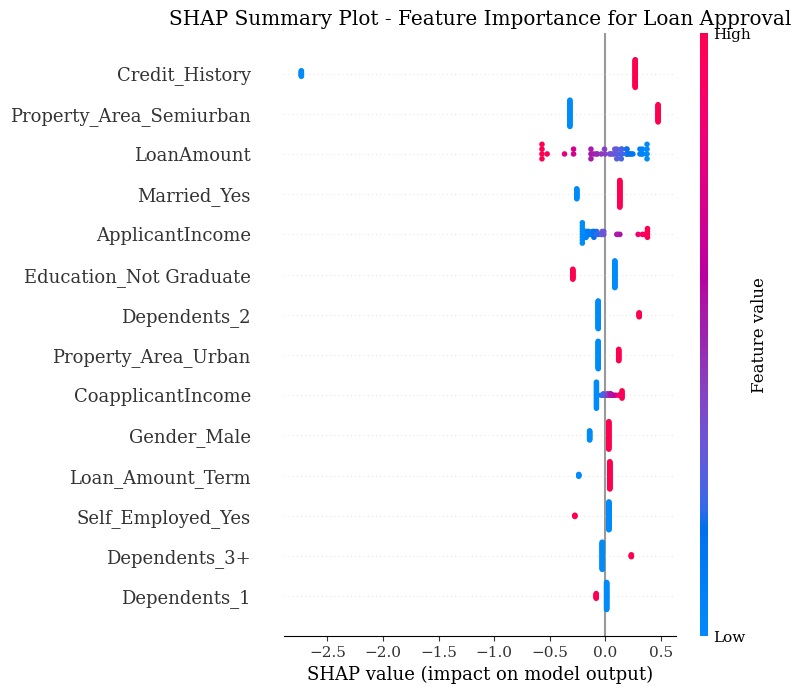

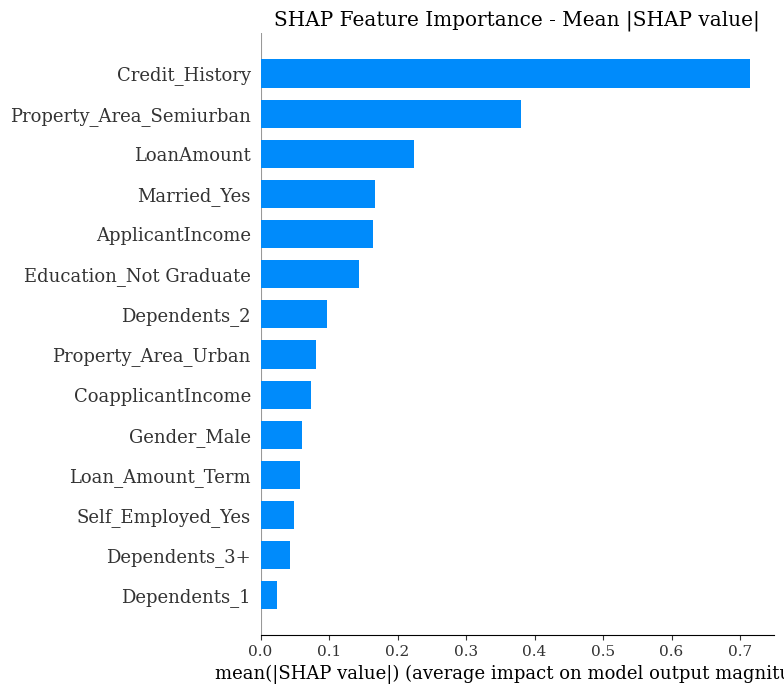


=== Individual Prediction Explanations ===

Sample 0 - Predicted: 1 (Prob: 0.764)
Top 5 contributing features:
  1. LoanAmount: -0.5687 → REJECT
  2. ApplicantIncome: 0.3807 → APPROVE
  3. Property_Area_Semiurban: -0.3174 → REJECT
  4. Credit_History: 0.2704 → APPROVE
  5. Dependents_3+: 0.2354 → APPROVE

Sample 1 - Predicted: 1 (Prob: 0.784)
Top 5 contributing features:
  1. ApplicantIncome: 0.3807 → APPROVE
  2. Property_Area_Semiurban: -0.3174 → REJECT
  3. LoanAmount: -0.2845 → REJECT
  4. Credit_History: 0.2704 → APPROVE
  5. Married_Yes: 0.1317 → APPROVE

Sample 2 - Predicted: 0 (Prob: 0.103)
Top 5 contributing features:
  1. Credit_History: -2.7343 → REJECT
  2. Property_Area_Semiurban: -0.3174 → REJECT
  3. Married_Yes: -0.2557 → REJECT
  4. LoanAmount: 0.1969 → APPROVE
  5. ApplicantIncome: -0.1920 → REJECT

Sample 3 - Predicted: 1 (Prob: 0.586)
Top 5 contributing features:
  1. Property_Area_Semiurban: -0.3174 → REJECT
  2. Education_Not Graduate: -0.2911 → REJECT
  3. Credi

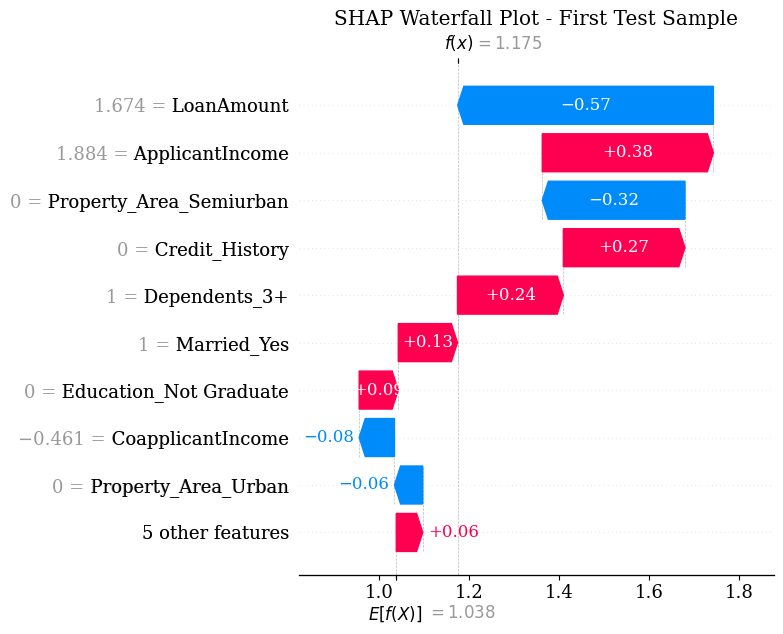


=== SHAP Analysis Complete ===
Key insights:
- SHAP values show how each feature contributes to the final prediction
- Positive SHAP values push towards loan approval
- Negative SHAP values push towards loan rejection
- The magnitude indicates the strength of the contribution


In [344]:
import shap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

print("=== SHAP Model Explanation ===")

# --- Asegurar que los datos ya están listos (numéricos y sin NaN) ---
X_train_processed = X_train.values
X_test_processed = X_test.values
feature_names = list(X_train.columns)

print(f"Total features: {len(feature_names)}")

# --- Crear explainer para el mejor clasificador ---
classifier = best_clf  # modelo final sin pipeline

if best_model_name in ["RandomForest", "XGBoost", "DecisionTree"]:
    explainer = shap.TreeExplainer(classifier)
    print(f"Using TreeExplainer for {best_model_name}")
else:
    explainer = shap.LinearExplainer(classifier, X_train_processed)
    print("Using LinearExplainer for Logistic Regression")

# --- Calcular SHAP values ---
sample_size = min(50, len(X_test))
X_test_sample = X_test_processed[:sample_size]

print(f"Calculating SHAP values for {sample_size} test samples...")
shap_values = explainer.shap_values(X_test_sample)

# Para binaria: quedarnos con la clase positiva
if isinstance(shap_values, list):
    shap_values = shap_values[1]

# --- Plots de resumen ---
print("Creating SHAP visualizations...")

plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_test_sample, feature_names=feature_names, show=False)
plt.title('SHAP Summary Plot - Feature Importance for Loan Approval')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test_sample, feature_names=feature_names,
                  plot_type="bar", show=False)
plt.title('SHAP Feature Importance - Mean |SHAP value|')
plt.tight_layout()
plt.show()

# --- Explicación de predicciones individuales ---
print("\n=== Individual Prediction Explanations ===")
test_predictions_labels = best_clf.predict(X_test_sample)
test_probabilities = best_clf.predict_proba(X_test_sample)

for i in range(min(5, sample_size)):
    prediction = test_predictions_labels[i]
    prob_approved = test_probabilities[i][1]

    print(f"\nSample {i} - Predicted: {prediction} (Prob: {prob_approved:.3f})")

    # Top 5 features para esta predicción
    feature_importance = list(zip(feature_names, shap_values[i]))
    feature_importance.sort(key=lambda x: abs(x[1]), reverse=True)

    print("Top 5 contributing features:")
    for j, (feature, shap_val) in enumerate(feature_importance[:5]):
        direction = "→ APPROVE" if shap_val > 0 else "→ REJECT"
        print(f"  {j+1}. {feature}: {shap_val:.4f} {direction}")

# --- Waterfall plot para la primera muestra ---
if sample_size > 0:
    base_value = explainer.expected_value
    if isinstance(base_value, (list, np.ndarray)):
        base_value = base_value[1] if len(base_value) > 1 else base_value[0]

    shap.waterfall_plot(
        shap.Explanation(values=shap_values[0],
                         base_values=base_value,
                         data=X_test_sample[0],
                         feature_names=feature_names),
        show=False
    )
    plt.title(f'SHAP Waterfall Plot - First Test Sample')
    plt.tight_layout()
    plt.show()

print("\n=== SHAP Analysis Complete ===")
print("Key insights:")
print("- SHAP values show how each feature contributes to the final prediction")
print("- Positive SHAP values push towards loan approval")
print("- Negative SHAP values push towards loan rejection")
print("- The magnitude indicates the strength of the contribution")
